# Download And Visualize Flower Dataset
*by Marvin Bertin*
<img src="../images/tensorflow.png" width="400">

**Dataset Description**
- Created by the Visual Geometry Group at University of Oxford
- Large images of flowers of variours sizes gathered from various websites.
- 5 classes/species of flowers 

## Imports

In [1]:
import sys  
sys.path.append("../") 

import tensorflow as tf
slim = tf.contrib.slim

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


%load_ext autoreload
%autoreload 2

## Downloader And Converter Helper Function for Flower Dataset
Download and convert the flower dataset into TensorFlow's native *TFRecord* format

A **TFRecords** file represents a sequence of (binary) strings. The format is not random access, so it is suitable for streaming large amounts of data but not suitable if fast sharding or other non-sequential access is desired.

In [2]:
from utils.download_and_convert_data import DownloaderAndConverter

flower_dir = "../data/flowers/"

data_access = DownloaderAndConverter()
data_access.download_and_convert(dataset_name="flowers", dataset_dir=flower_dir)

>> Downloading flower_photos.tgz 100.0%
Successfully downloaded flower_photos.tgz 228813984 bytes.
>> Converting image 3320/3320 shard 4
>> Converting image 350/350 shard 4

Finished converting the Flowers dataset!


## Visualize Flower Samples

The *flowers* helper function loads the TFRecord files and generate a *slim.dataset.Dataset*

**slim.dataset.Dataset**

A Dataset is a collection of several components:
1. stores pointers to the data file
2. a Reader class that can read those sources and returns possibly encoded samples of data
3. a decoder that decodes each sample of data provided by the reader
4. metadata such as the class labels and the train/test split

**slim.dataset_data_provider.DatasetDataProvider**

A DatasetDataProvider:
1. provides data from datasets
2. the provide can be configured to use multiple readers simultaneously or read via a single reader
3. the data being read can be optionally shuffled

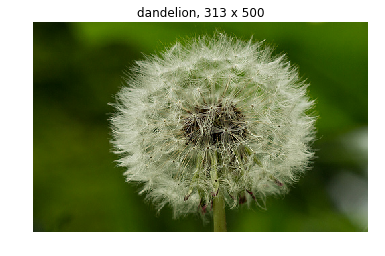

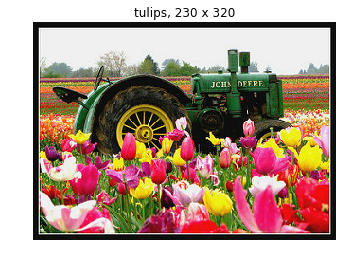

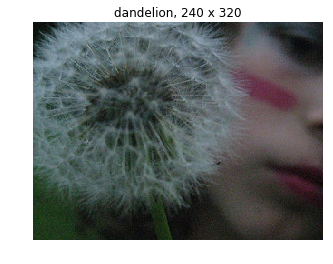

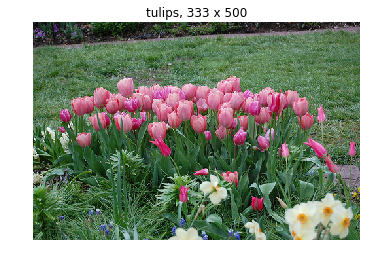

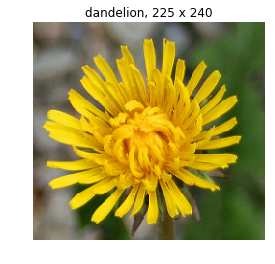

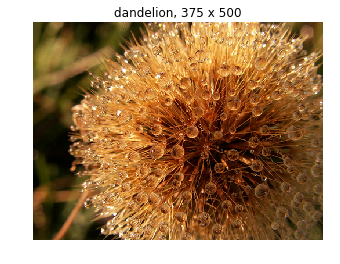

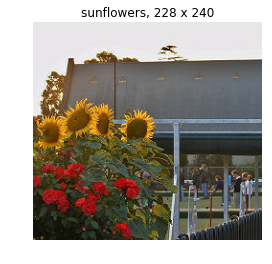

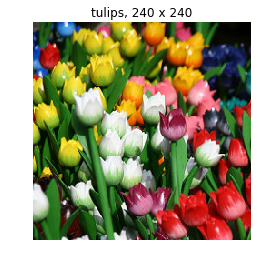

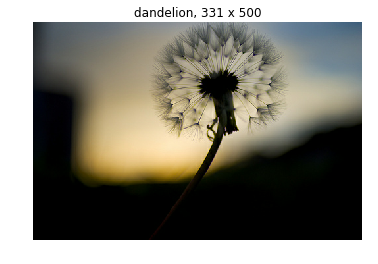

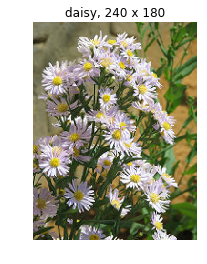

In [6]:
from utils.datasets import flowers

with tf.Graph().as_default(): 
    dataset = flowers.get_split('train', flower_dir)
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(10):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image.squeeze(), cmap='Greys')
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()

## Next Lesson
### Deep Convolutional Neural Network for image classification in TensorFlow-Slim
-  Define Deep Convolutional Neural Network for classification task on image dataset.

<img src="../images/divider.png" width="100">